In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Lagrange_Polynomial:
    def __init__(self, data_x, data_y):
        '''
        First we need to check whether the input vectors (numpy arrays) are equal
        or not.
        assert (condition), "msg"
        this command checks if the condition is true or false. If true, the code
        runs normally. But if false, then the code returns an error message "msg"
        and stops execution
        '''
        assert len(data_x) == len(data_y), "length of data_x and data_y must be equal"

        '''
        Lagrange polynomials do not use coefficeints a_i, rather the nodes
        (x_i, y_i). Hence, we just need to store these inside the object
        '''

        self.data_x = data_x
        self.data_y = data_y

        self.degree = len(data_x) - 1
        # we assume that the inputs are numpy array, so we can perform
        # element wise operations

    def __repr__(self):
        # method for string representation
        # you don't need to worry about the following code if you don't understand
        strL = f"LagrangePolynomial of order {self.degree}\n"
        strL += "p(x) = "
        for i in range(len(self.data_y)):
            if self.data_y[i] == 0:
                continue
            elif self.data_y[i] >= 0:
                strL += f"+ {self.data_y[i]}*l_{i}(x) "
            else:
                strL += f"- {-self.data_y[i]}*l_{i}(x) "

        return strL

    def l(self, k, x):


        l_k = 1.0 # Initialization

        # --------------------------------------------
        # YOUR CODE HERE
        x_k=self.data_x[k]
        for j in range(self.degree+1):
          if j!=k:
            x_j=self.data_x[j]
            l_k*=(x-x_j)/(x_k-x_j)
          else:
            continue
        return l_k


    def __call__(self, x_arr):

        # initialize with zero
        p_x_arr  = np.zeros(len(x_arr))

        # --------------------------------------------
        # YOUR CODE HERE

        for i,x in enumerate(x_arr):
          for j in range(self.degree+1):
            p_x_arr[i]+=self.data_y[j]*self.l(j,x)


        return p_x_arr

In [ ]:
import numpy as np

LagrangePolynomial of order 6
p(x) = + 4.0*l_0(x) + 1.193*l_1(x) + 6.156*l_2(x) + 2.0*l_3(x) + 1.803*l_4(x) + 2.558*l_5(x) 


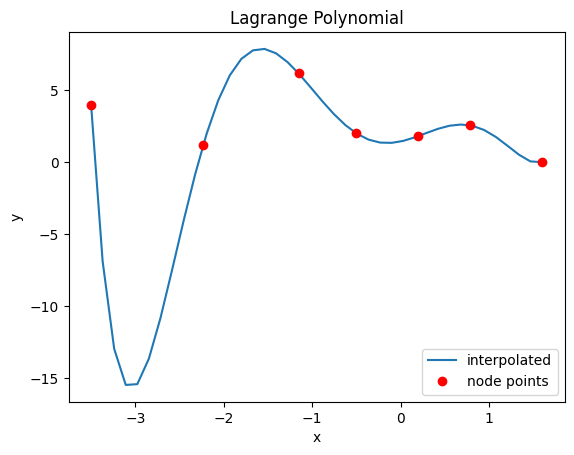

In [ ]:
data_x = np.array([-3.5, -2.231, -1.152, -0.5, 0.198, 0.785, 1.6])
data_y = np.array([4.0, 1.193, 6.156, 2.0, 1.803, 2.558, 0.0])

p = Lagrange_Polynomial(data_x, data_y)
print(p)

#generating 50 points from -2.55 to 1.189 in order to create a smooth line
x_arr = np.linspace(-3.5, 1.6, 40)
p_x_arr = p(x_arr)

# plot to see if your implementation is correct
#google the functions to understand what each parameters mean, if not apparent
plt.plot(x_arr, p_x_arr)
plt.plot(data_x, data_y, 'ro')
plt.legend(['interpolated', 'node points'], loc = 'lower right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Polynomial')

plt.show()


LagrangePolynomial of order 2
p(x) = + 8*l_0(x) + 16*l_1(x) + 24*l_2(x) 


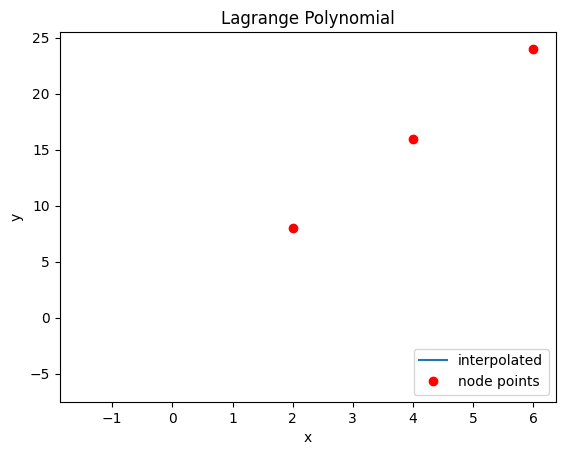

--------------------
Value of the interpolating polynomial at x = -1.5 is -6.0
--------------------
The actual interpolation error at x = -1.5 is 0.0


In [ ]:
#your code here
def given(x):
  return 4*x

data_x=np.array([2,4,6])
data_y=np.array([8,16,24])
p=Lagrange_Polynomial(data_x,data_y)
print(p)
x_arr=[-1.5]
p_x_arr=p(x_arr)
plt.plot(x_arr, p_x_arr)
plt.plot(data_x, data_y, 'ro')
plt.legend(['interpolated', 'node points'], loc = 'lower right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Polynomial')
plt.show()
print("--------------------")
print(f"Value of the interpolating polynomial at x = {x_arr[0]} is {p_x_arr[0]}")
print("--------------------")
print(f"The actual interpolation error at x = {x_arr[0]} is {abs((given(x_arr[0]))-p_x_arr[0])}")